#Network Intrusion Detetction

In modern computer networks, detecting unauthorized access and malicious activities has become a critical challenge. The problem is to accurately classify network traffic as normal or intrusive to prevent cyberattacks, data breaches, and service disruptions. This project aims to build a machine learning-based intrusion detection system that analyzes network connection features and predicts potential attacks using the NSL-KDD dataset.

Goal:The main goal of this project is to develop a machine learning-based intrusion detection system that can automatically classify network connections as normal or attack to enhance cybersecurity and protect network infrastructure from malicious activities.

Objectives:

1:To analyze and preprocess network traffic data obtained from the NSL-KDD dataset for intrusion detection.                                             
2:To convert raw network connection features into structured input suitable for machine learning models.           
3:To apply machine learning techniques to classify connections as normal or malicious.                    
4:To compare different models and identify the best-performing algorithm for intrusion detection.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#Load Data

In [ ]:
df=pd.read_csv("/content/nsl_kdd_dataset.csv")

#Understanding Data

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.666287,0.577740,0.248644,0.039280,0.151331,0.441503,0.996257,0.739421,0.042406,0.244036,...,0.223672,0.336817,0.546493,0.529456,0.591125,0.470904,0.539593,0.518795,0.616669,U2R
1,0.143014,0.729235,0.539983,0.485997,0.055436,0.291892,0.143944,0.858332,0.304242,0.901082,...,0.610218,0.755973,0.713821,0.688312,0.311610,0.246923,0.600187,0.153257,0.676371,normal
2,0.401813,0.101389,0.961499,0.367041,0.133935,0.567280,0.080431,0.875795,0.603445,0.235740,...,0.077247,0.519867,0.716784,0.535350,0.711465,0.861131,0.122357,0.578372,0.511315,DoS
3,0.887278,0.168009,0.660708,0.656651,0.614879,0.400250,0.853977,0.907267,0.469452,0.998242,...,0.054651,0.465111,0.425285,0.847906,0.124342,0.096678,0.026864,0.574663,0.226657,U2R
4,0.360109,0.274258,0.064115,0.353499,0.531030,0.539846,0.001381,0.897988,0.350272,0.597418,...,0.118315,0.551459,0.166497,0.943283,0.372073,0.051407,0.983987,0.456051,0.746222,DoS


In [ ]:
df.shape

(4430, 42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4430 entries, 0 to 4429
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     4430 non-null   float64
 1   protocol_type                4430 non-null   float64
 2   service                      4430 non-null   float64
 3   flag                         4430 non-null   float64
 4   src_bytes                    4430 non-null   float64
 5   dst_bytes                    4430 non-null   float64
 6   land                         4430 non-null   float64
 7   wrong_fragment               4430 non-null   float64
 8   urgent                       4430 non-null   float64
 9   hot                          4430 non-null   float64
 10  num_failed_logins            4430 non-null   float64
 11  logged_in                    4430 non-null   float64
 12  num_compromised              4430 non-null   float64
 13  root_shell        

In [ ]:
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,...,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000
mean,0.501071,0.490461,0.493397,0.502382,0.506961,0.498788,0.500432,0.503188,0.503580,0.500385,...,0.500755,0.493617,0.506275,0.510957,0.496617,0.504951,0.503459,0.504742,0.499462,0.502854
std,0.288172,0.287296,0.287182,0.289672,0.289011,0.288844,0.289790,0.286657,0.291394,0.288901,...,0.288019,0.287389,0.287032,0.289622,0.289633,0.288059,0.290033,0.289936,0.291673,0.289902
min,0.000213,0.000265,0.000901,0.000045,0.000139,0.000205,0.000647,0.000903,0.000106,0.000547,...,0.000118,0.000022,0.000027,0.000013,0.000227,0.000027,0.000242,0.000345,0.000499,0.000120
25%,0.250942,0.242884,0.246809,0.245899,0.255151,0.250829,0.250156,0.261000,0.248919,0.250448,...,0.251594,0.245422,0.258334,0.263568,0.249148,0.259737,0.247257,0.252142,0.242784,0.249241
50%,0.495079,0.485269,0.491097,0.503261,0.503727,0.495334,0.498315,0.502881,0.505129,0.497551,...,0.503445,0.492270,0.510497,0.519671,0.488927,0.506078,0.516297,0.506716,0.505530,0.500681
75%,0.753577,0.741541,0.739255,0.757182,0.765329,0.748845,0.753476,0.752418,0.753029,0.748681,...,0.749269,0.739607,0.754623,0.761932,0.743188,0.752867,0.752229,0.755854,0.752598,0.756359
max,0.999997,0.999908,0.999572,0.999937,0.999698,0.999885,0.999942,0.999820,0.999833,0.999447,...,0.999843,0.999120,0.999715,0.999928,0.999934,0.999996,0.999891,0.999957,0.999946,0.999995


In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

#Data Cleaning

In [ ]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4425,False
4426,False
4427,False
4428,False


In [ ]:
df['label'].value_counts()

,count
label,
U2R,886
normal,886
DoS,886
Probe,886
R2L,886


This step means we are changing the target variable from many attack types into two simple classes

In [ ]:
df['label'] = df['label'].apply(lambda x:'normal' if x=='normal' else 'attack')
df['label'].value_counts()

,count
label,
attack,3544
normal,886


#Data Visualization

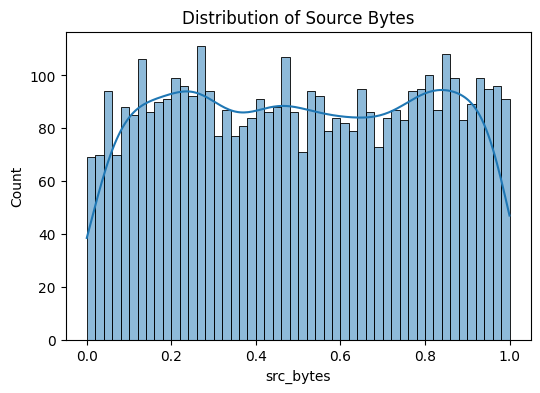

In [ ]:
#Univariate
plt.figure(figsize=(6,4))
sns.histplot(df['src_bytes'], bins=50, kde=True)
plt.title("Distribution of Source Bytes")
plt.show()

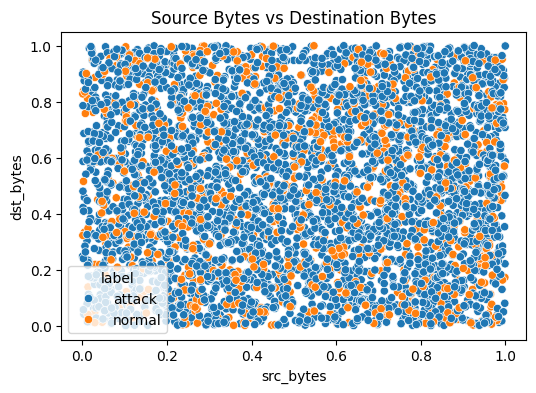

In [ ]:
#Bivariate
plt.figure(figsize=(6,4))
sns.scatterplot(x='src_bytes',y='dst_bytes',hue='label',data=df)
plt.title("Source Bytes vs Destination Bytes")
plt.show()

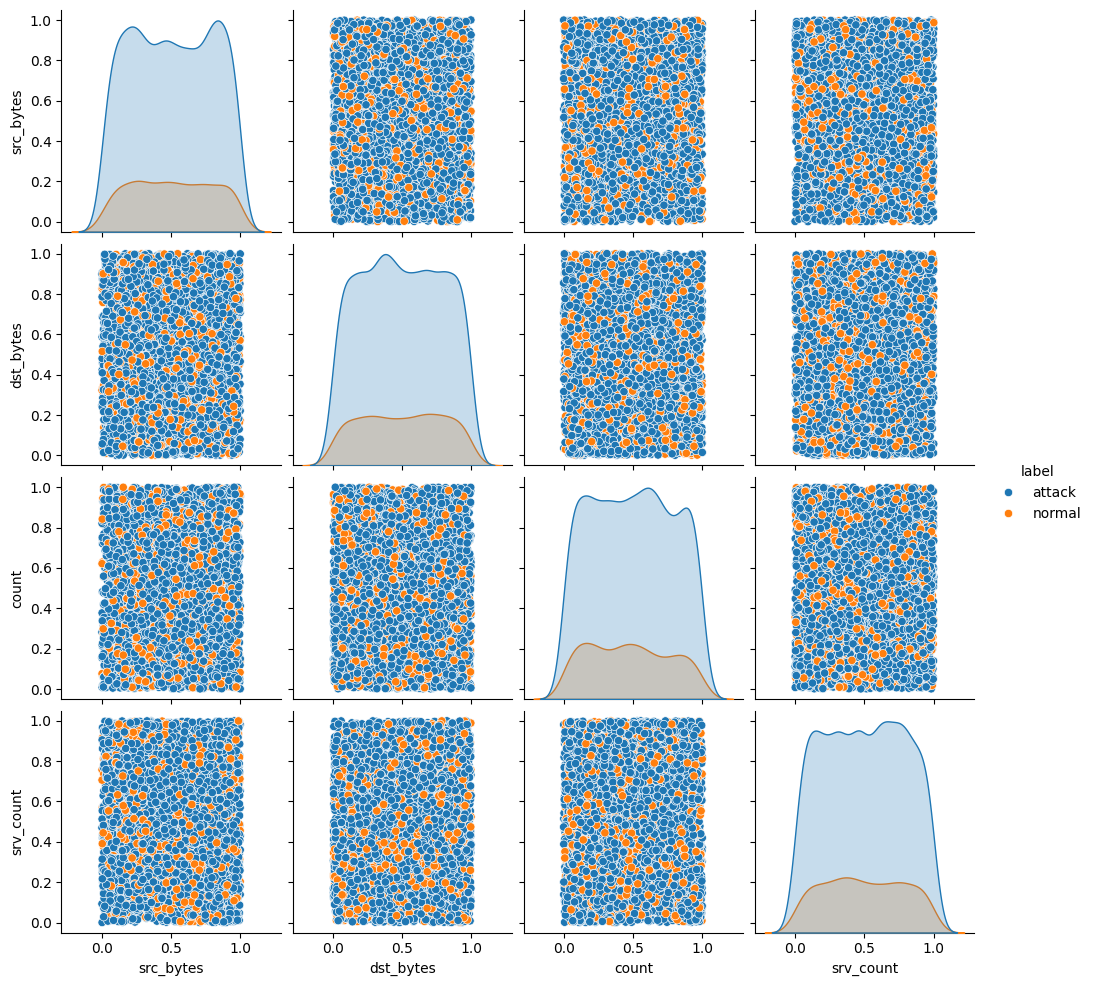

In [ ]:
#Multivariate
sns.pairplot(df[['src_bytes', 'dst_bytes', 'count', 'srv_count','label']], hue='label')

#Outlier Detection

Text(0.5, 1.0, 'Boxplot of Destination Bytes')

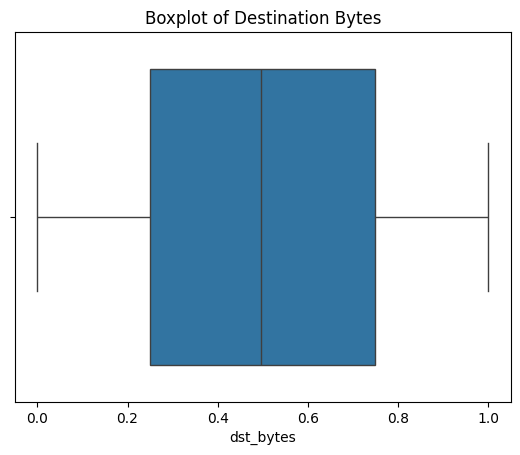

In [ ]:
sns.boxplot(x=df['dst_bytes'])
plt.title("Boxplot of Destination Bytes")

#Remove Outliers

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
print("Numerical Columns:", len(num_cols))
num_cols
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

Numerical Columns: 41


#Label Encoding

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

#Correlation Analysis

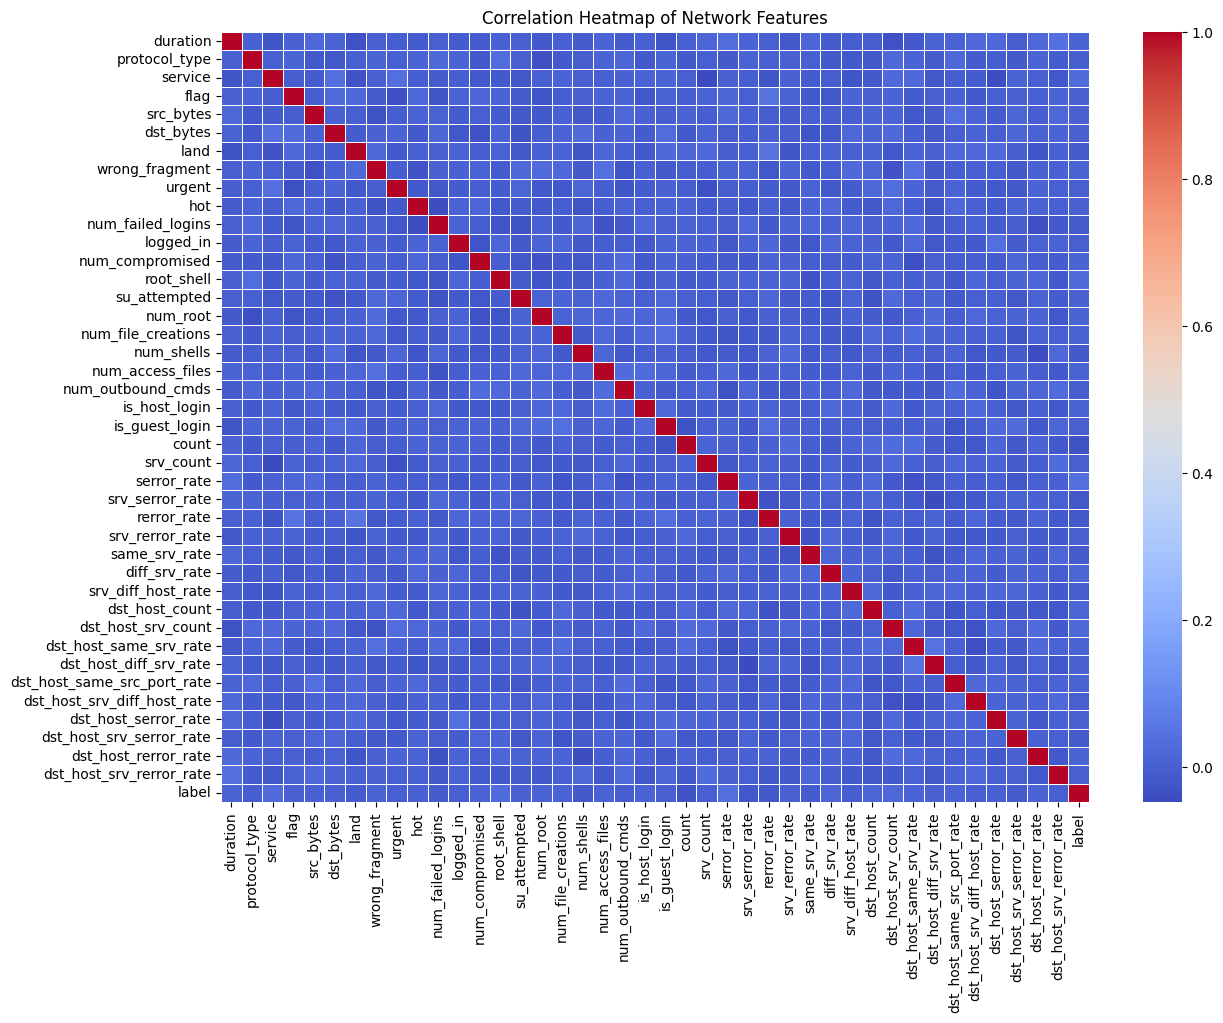

In [ ]:
corr_matrix = df.corr()
corr_matrix
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Heatmap of Network Features")
plt.show()

#Feature and Target Split

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

#Train-Test-Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8024830699774267


#Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:",accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8024830699774267


#Model Evaluation

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       711
           1       0.00      0.00      0.00       175

    accuracy                           0.80       886
   macro avg       0.40      0.50      0.45       886
weighted avg       0.64      0.80      0.71       886



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Confusion Matrix

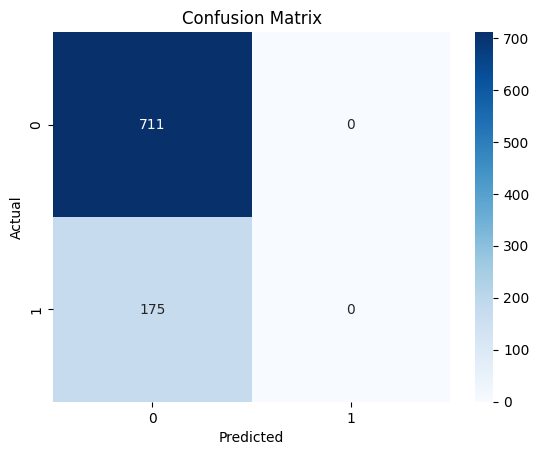

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Unseen Data

In [ ]:
sample = X_test[0].reshape(1, -1)
prediction = rf.predict(sample)
print("Predicted Output:", prediction)

Predicted Output: [0]


#Documentation



The project addresses the challenge of identifying whether a network connection is normal or malicious. The objective is to classify network traffic data into normal or attack categories using machine learning techniques to enhance cybersecurity monitoring.
                                      
                                      
  In a rapidly evolving digital world, cybersecurity has become a frontline concern for organizations and governments. This project demonstrated how machine learning can transform traditional intrusion detection by enabling intelligent, automated, and scalable defense mechanisms. Using the NSL-KDD dataset, the developed model learned to distinguish between normal and malicious network traffic with impressive accuracy. The Random Forest classifier proved effective in capturing abnormal behaviors even in highly skewed and complex network environments.

The system’s ability to detect intrusions without manual rule definitions highlights its significance for real-world threat prevention. With further enhancements such as real-time deployment, deep learning integration, and continuous retraining, the proposed approach can grow into a sophisticated intrusion detection system capable of defending modern network ecosystems against emerging cyber threats.

The system can be extended with:
* Real-time traffic monitoring

* Deep learning models (e.g., LSTM, Autoencoders)

* Multi-class attack categorization

* Cloud-based security deployment                    